[1]


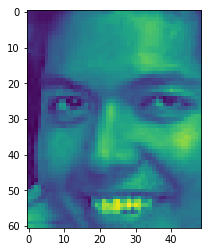

[1]


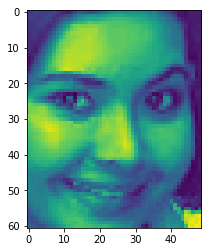

[1]


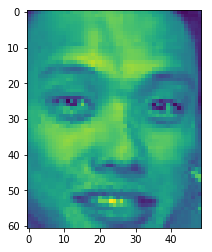

[1]


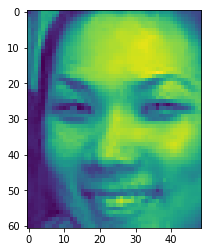

[1]


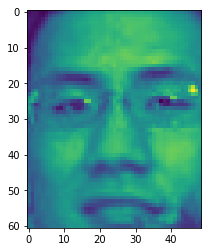

[1]


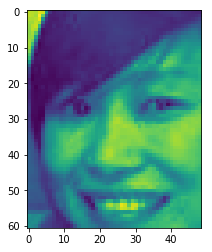

[1]


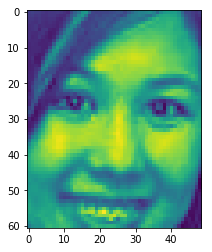

[1]


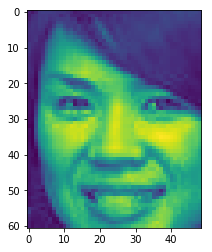

[1]


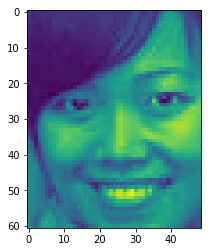

[1]


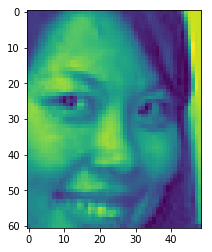

[0]


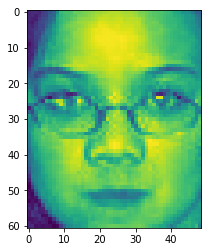

[1]


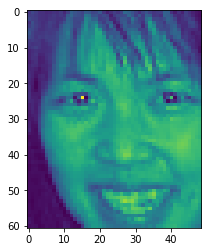

[2]


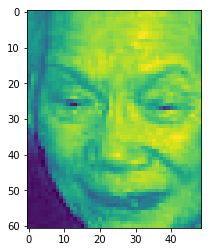

[0]


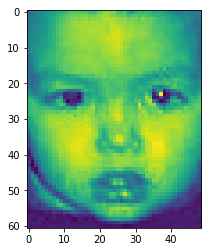

[2]


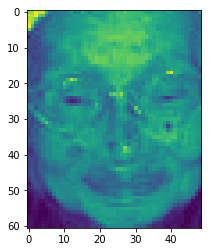

[0]


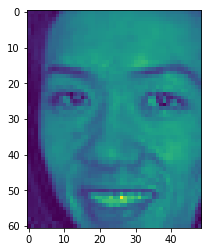

[1]


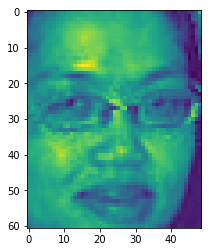

[0]


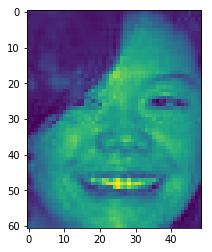

[0]


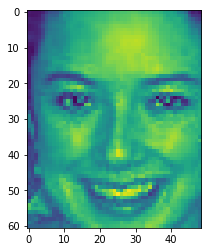

[1]


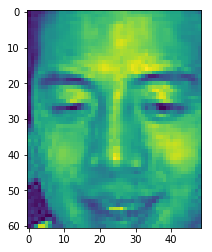

[0]


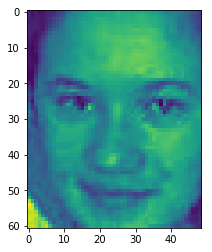

[1]


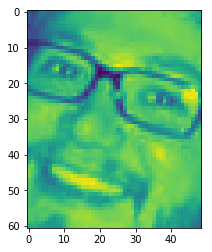

[1]


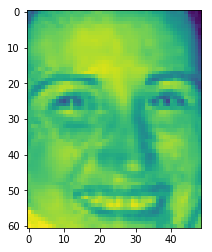

[1]


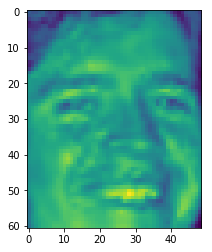

[1]


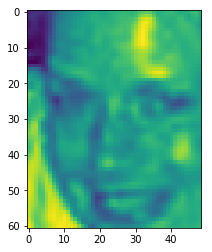

[1]


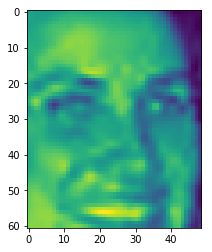

[1]


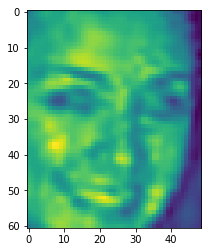

[1]


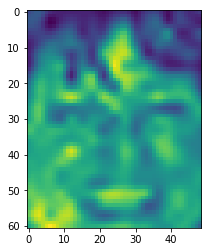

[1]


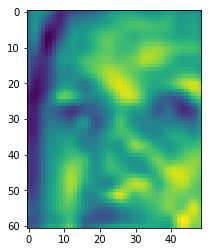

[2]


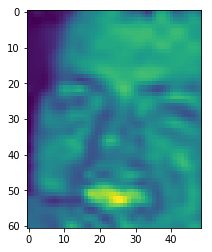

[2]


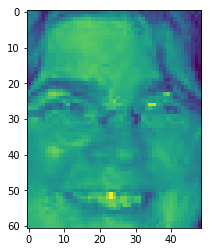

[2]


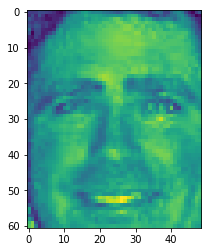

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.reset_default_graph()

# parser 함수 정의
def parser(serialized_example):
    features = {
        'age': tf.FixedLenFeature([1], tf.int64),
        'img': tf.FixedLenFeature([61*49], tf.int64) # flatten되어 있으므로 61*49가 된다. 
    }
    
    parsed_feature = tf.parse_single_example(serialized_example, features) #하나의 example을 feature에 맞게 파싱
    #내부에서 casting이 필요
    age = tf.cast(parsed_feature['age'], tf.int32)
    img = tf.cast(parsed_feature['img'], tf.float32)
    return age, img

face_train = './cnn_dataset/face_train.tfrecord'
train_dataset = tf.contrib.data.TFRecordDataset(face_train).map(parser) #어떤 포맷인지 알고 정의된 포맷으로 가져오겠다고 설정하는 것
train_dataset = dataset.batch(32)
train_dataset = dataset.shuffle(7777)

face_test = './cnn_dataset/face_test.tfrecord'
test_dataset = tf.contrib.data.TFRecordDataset(face_test).map(parser) #어떤 포맷인지 알고 정의된 포맷으로 가져오겠다고 설정하는 것
test_dataset = dataset.batch(32)
test_dataset = dataset.shuffle(7777)

itr = train_dataset.make_one_shot_iterator()

age, img = itr.get_next()
img = tf.reshape(img, [-1, 61, 49])

with tf.Session() as sess:
    _age, _img = sess.run([age, img]) #fetch는 늘 하나만 들어가야하기 때문에 list 형태로
    for i in range(32):
        print(_age[i])
        plt.imshow(_img[i])
        plt.show()
    